<a href="https://colab.research.google.com/github/NehaKumari500092077/Deep-Learning-Lab/blob/main/Programming%20Assignment%207%20Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get all the imports

In [ ]:
!pip install yfinance
import yfinance as yf
import torch
torch.manual_seed(27)
# torch.use_deterministic_algorithms(True)
import random
random.seed(27)
import pandas as pd
import numpy as np
np.random.seed(27)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler

## Load the data and split into train, test and validation

In [ ]:
# Download the data
df = yf.download("^GSPC", period='10y')
# Reset index to make 'Date' a column
df = df.reset_index()
# Correct the format of the columns
df.columns = [i[0] for i in df.columns]
# Convert the Month column to type "datetime" for easier manipulation of data
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')
# First, define split points
start_date = df["Date"].min()
train_end = start_date + pd.DateOffset(years=7)
val_end = train_end + pd.DateOffset(years=1, months=6)
# Now, split the dataset
df_train = df[df["Date"] < train_end]
df_val = df[(df["Date"] >= train_end) & (df["Date"] < val_end)]
df_test = df[df["Date"] >= val_end]
# Check out the splits
print("Training Split with number of samples:", len(df_train))
display(df_train.head())
print("\n\nValidation Split with number of samples:", len(df_val))
display(df_val.head())
print("\n\nTest Split with number of samples:", len(df_test))
display(df_test.head())

# Scale the values appropriately
scaler = MinMaxScaler()
df_train[["Close", "Open", "Low", "High", "Volume"]] = scaler.fit_transform(df_train[["Close", "Open", "Low", "High", "Volume"]].values)
df_val[["Close", "Open", "Low", "High", "Volume"]] = scaler.transform(df_val[["Close", "Open", "Low", "High", "Volume"]].values)
df_test[["Close", "Open", "Low", "High", "Volume"]] = scaler.transform(df_test[["Close", "Open", "Low", "High", "Volume"]].values)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Training Split with number of samples: 1764


,Date,Close,High,Low,Open,Volume
0,2015-03-09,2079.429932,2083.489990,2072.209961,2072.250000,3349090000
1,2015-03-10,2044.160034,2076.139893,2044.160034,2076.139893,3668900000
2,2015-03-11,2040.239990,2050.080078,2039.689941,2044.689941,3406570000
3,2015-03-12,2065.949951,2066.409912,2041.099976,2041.099976,3405860000
4,2015-03-13,2053.399902,2064.560059,2041.170044,2064.560059,3498560000




Validation Split with number of samples: 378


,Date,Close,High,Low,Open,Volume
1764,2022-03-09,4277.879883,4299.399902,4223.100098,4223.100098,5662670000
1765,2022-03-10,4259.520020,4268.279785,4209.799805,4252.549805,4980830000
1766,2022-03-11,4204.310059,4291.009766,4200.490234,4279.500000,4938640000
1767,2022-03-14,4173.109863,4247.569824,4161.720215,4202.750000,5574920000
1768,2022-03-15,4262.450195,4271.049805,4187.899902,4188.819824,5392470000




Test Split with number of samples: 374


,Date,Close,High,Low,Open,Volume
2142,2023-09-11,4487.459961,4490.770020,4467.890137,4480.979980,3369920000
2143,2023-09-12,4461.899902,4487.109863,4456.830078,4473.270020,3435740000
2144,2023-09-13,4467.439941,4479.390137,4453.520020,4462.649902,3529430000
2145,2023-09-14,4505.100098,4511.990234,4478.689941,4487.779785,3648720000
2146,2023-09-15,4450.319824,4497.979980,4447.209961,4497.979980,6932230000


<ipython-input-2-563b9392740f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[["Close", "Open", "Low", "High", "Volume"]] = scaler.fit_transform(df_train[["Close", "Open", "Low", "High", "Volume"]].values)
<ipython-input-2-563b9392740f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[["Close", "Open", "Low", "High", "Volume"]] = scaler.transform(df_val[["Close", "Open", "Low", "High", "Volume"]].values)
<ipython-input-2-563b9392740f>:29: SettingWithCopyWarning: 
A value is trying to be 

## Check out the data trend

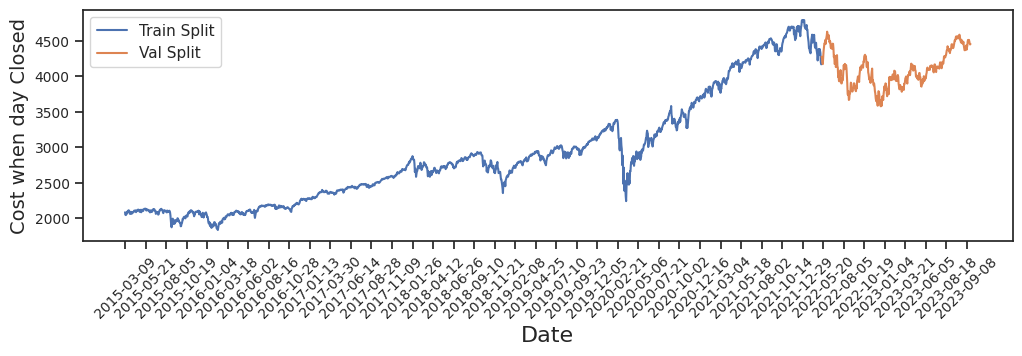

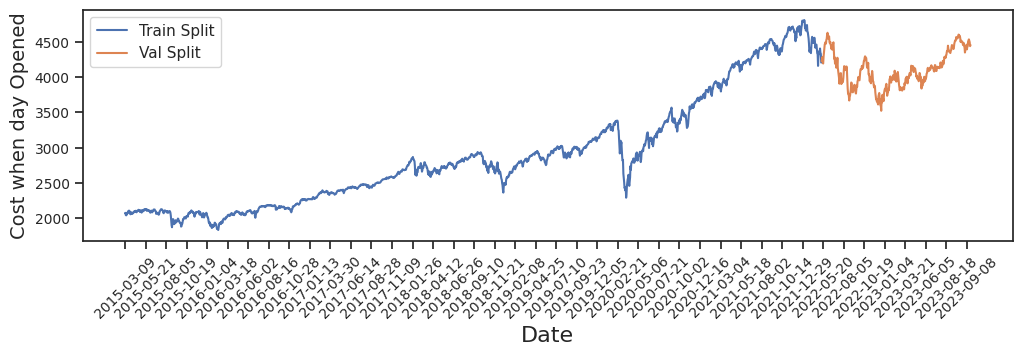

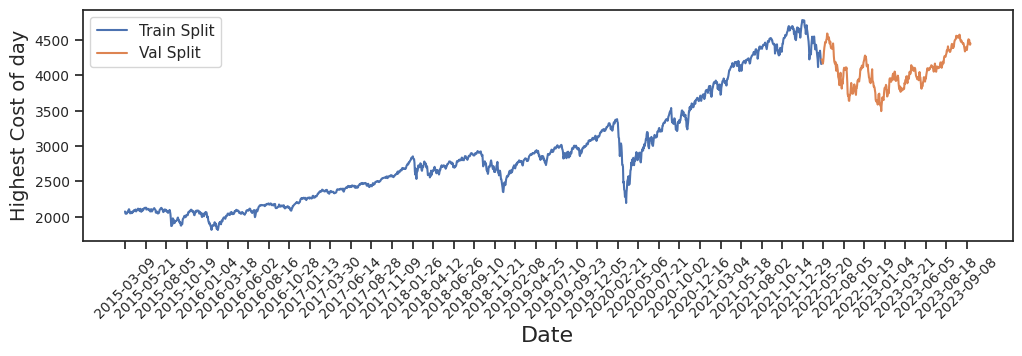

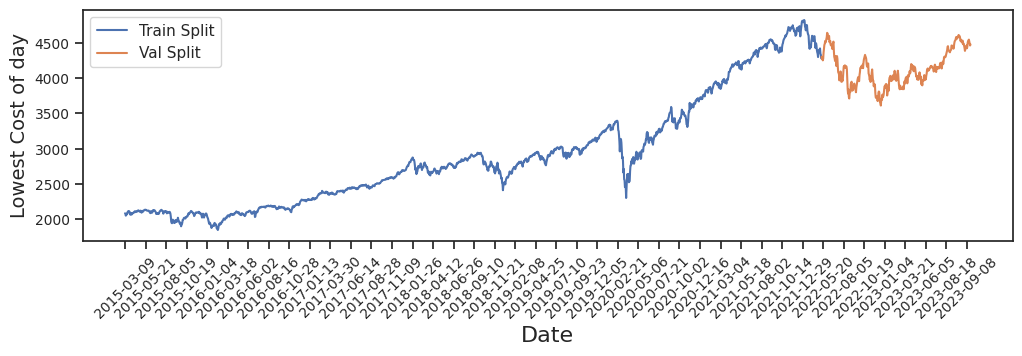

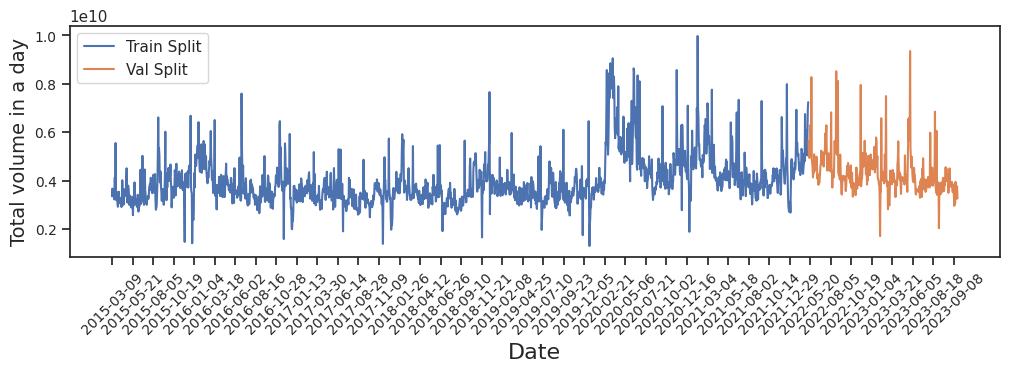

In [ ]:
y_value_train = scaler.inverse_transform(df_train[["Close", "Open", "Low", "High", "Volume"]])
y_value_val = scaler.inverse_transform(df_val[["Close", "Open", "Low", "High", "Volume"]])

labels = ["Cost when day Closed",
          "Cost when day Opened",
          "Highest Cost of day",
          "Lowest Cost of day",
          "Total volume in a day"]
num_ticks_skip = 52

for i in range(len(labels)):
    plt.figure(figsize=(12, 3))
    sns.lineplot(x=np.arange(len(df_train)), y=y_value_train[:,i], label="Train Split")
    sns.lineplot(x=np.arange(len(df_train), len(df_train)+len(df_val)), y=y_value_val[:,i], label="Val Split")
    train_ticks = [i for idx, i in enumerate(df_train["Date"].dt.strftime("%Y-%m-%d").tolist()) if idx%num_ticks_skip==0]
    val_ticks = [i for idx, i in enumerate(df_val["Date"].dt.strftime("%Y-%m-%d").tolist()) if (idx+1)%num_ticks_skip==0] + [df_val["Date"].dt.strftime("%Y-%m-%d").tolist()[-1]]
    plt.xticks(np.arange(0, len(df_train)+len(df_val)+1, num_ticks_skip), train_ticks + val_ticks, rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel("Date", fontsize=16)
    plt.ylabel(labels[i], fontsize=14)
    plt.legend()
    plt.show()
    plt.close()
    print()

## Design the data module responsible for data processing and generating data loaders

In [ ]:
class DataModule:
    def __init__(self, window_size, stride, batch_size):
        self.window_size = window_size
        self.stride = stride
        self.batch_size = batch_size

    def convert_data_to_sequence_format(self, data):
        X, Y = list(), list()
        for i in range(0, len(data)-self.window_size, self.stride):
            X.append(data[i:i+self.window_size])
            Y.append(data[i+self.window_size])
        X, Y = np.asarray(X), np.asarray(Y)
        return X, Y

    def data_loader(self, X, Y, shuffle=True):
        return DataLoader(TensorDataset(torch.tensor(X), torch.tensor(Y)), num_workers=2, batch_size=self.batch_size, shuffle=shuffle)

## Design a Custom GRU cell

In [ ]:
class GRUCell(torch.nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(GRUCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation = torch.nn.Sigmoid()
        self.reset_gate_input_layer = torch.nn.Linear(input_size, hidden_size, bias=bias)
        self.reset_gate_hidden_layer = torch.nn.Linear(hidden_size, hidden_size, bias=bias)
        self.update_gate_input_layer = torch.nn.Linear(input_size, hidden_size, bias=bias)
        self.update_gate_hidden_layer = torch.nn.Linear(hidden_size, hidden_size, bias=bias)
        self.new_gate_input_layer = torch.nn.Linear(input_size, hidden_size, bias=bias)
        self.new_gate_hidden_layer = torch.nn.Linear(hidden_size, hidden_size, bias=bias)

    def forward(self, x):
        output = list()
        ht = torch.rand((x.shape[0], self.hidden_size)).to(x.device)
        ht = ht/torch.sqrt(torch.sum(torch.square(ht), dim=0))
        for i in range(x.shape[1]):
            rt = self.activation(self.reset_gate_input_layer(x[:,i]) + self.reset_gate_hidden_layer(ht))
            zt = self.activation(self.update_gate_input_layer(x[:,i]) + self.update_gate_hidden_layer(ht))
            nt = torch.nn.Tanh()(self.new_gate_input_layer(x[:,i]) + rt * self.new_gate_hidden_layer(ht))
            ht = (1-zt) * nt + zt * ht
            output.append(ht)
        output = torch.stack(output)
        output = torch.swapdims(output, 0, 1)
        return output

## Define the Custom GRU model

In [ ]:
class GRU(torch.nn.Module):
    def __init__(self, num_layers, input_size, hidden_size, bias, device):
        super(GRU, self).__init__()
        # Stack up RNN cells to produce a deep RNN model
        self.GRU_layers = list()
        for i in range(num_layers):
            if i == 0:
                self.GRU_layers.append(GRUCell(input_size, hidden_size, bias).to(device))
            else:
                self.GRU_layers.append(GRUCell(hidden_size, hidden_size, bias).to(device))
        self.GRU_layers = torch.nn.Sequential(*self.GRU_layers)
        # The final output layer
        self.linear = torch.nn.Linear(hidden_size, 5)
        # Define the optimizer
        self.optimizer = torch.optim.AdamW(self.parameters(), lr=0.0001)
        # Define the objective function
        self.criterion = torch.nn.MSELoss()

    def forward(self, x):
        x = self.GRU_layers(x)
        x = self.linear(x[:,-1]).squeeze()
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        self.optimizer.zero_grad()
        preds = self.forward(x.float())
        loss = self.criterion(preds, y.float())
        loss.backward()
        self.optimizer.step()
        return loss.item(), preds.numpy(force=True)

    def validation_step(self, batch, batch_idx):
        x, y = batch
        preds = self.forward(x.float())
        loss = self.criterion(preds, y.float())
        return loss.item(), preds.numpy(force=True)

## Get the data loaders

In [ ]:
window_size, stride = 6, 1
batch_size = 32

# First process the data into sequential format
data_module = DataModule(window_size, stride, batch_size)
data = df_train[["Close", "Open", "Low", "High", "Volume"]].values
X_train, Y_train = data_module.convert_data_to_sequence_format(data)
print("Train data shape:", X_train.shape, Y_train.shape)

data = df_val[["Close", "Open", "Low", "High", "Volume"]].values
X_val, Y_val = data_module.convert_data_to_sequence_format(data)
X_val = np.concatenate((X_train[-window_size:], X_val), axis=0)
Y_val = np.concatenate((Y_train[-window_size:], Y_val), axis=0)
print("Val data shape:", X_val.shape, Y_val.shape)

data = df_test[["Close", "Open", "Low", "High", "Volume"]].values
X_test, Y_test = data_module.convert_data_to_sequence_format(data)
X_test = np.concatenate((X_val[-window_size:], X_test), axis=0)
Y_test = np.concatenate((Y_val[-window_size:], Y_test), axis=0)
print("Test data shape:", X_test.shape, Y_test.shape)

# Now generate data loaders
train_data_loader = data_module.data_loader(X_train, Y_train, shuffle=True)
val_data_loader = data_module.data_loader(X_val, Y_val, shuffle=False)
test_data_loader = data_module.data_loader(X_test, Y_test, shuffle=False)

Train data shape: (1758, 6, 5) (1758, 5)
Val data shape: (378, 6, 5) (378, 5)
Test data shape: (374, 6, 5) (374, 5)


## Perform training and validation with our custom GRU

In [ ]:
num_layers = 4
input_size = X_train.shape[-1]
hidden_size = 128
num_epochs = 200

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GRU(num_layers, input_size, hidden_size, True, device).to(device)

train_epoch_loss = list()
val_epoch_loss = list()
min_val_loss = np.inf
for epoch in tqdm(range(num_epochs)):
    # Training loop
    train_iter_loss = list()
    model.train()
    for batch_idx, batch in enumerate(train_data_loader):
        batch = (batch[0].to(device), batch[1].to(device))
        loss, _ = model.training_step(batch, batch_idx)
        train_iter_loss.append(loss)
    train_epoch_loss.append(sum(train_iter_loss)/len(train_iter_loss))
    # print("\nAverage Training MSE in Epoch", epoch+1, ":", train_epoch_loss[-1], "\n")

    # Validation loop
    val_iter_loss = list()
    model.eval()
    for batch_idx, batch in enumerate(val_data_loader):
        batch = (batch[0].to(device), batch[1].to(device))
        loss, _ = model.validation_step(batch, batch_idx)
        val_iter_loss.append(loss)
    val_epoch_loss.append(sum(val_iter_loss)/len(val_iter_loss))
    if val_epoch_loss[-1] < min_val_loss:
        min_val_loss = val_epoch_loss[-1]
        best_model = deepcopy(model)
    # print("\nAverage Validation MSE in Epoch", epoch+1, ":", val_epoch_loss[-1], "\n")

100%|██████████| 200/200 [08:57<00:00,  2.69s/it]


## Plot the training and validation losses

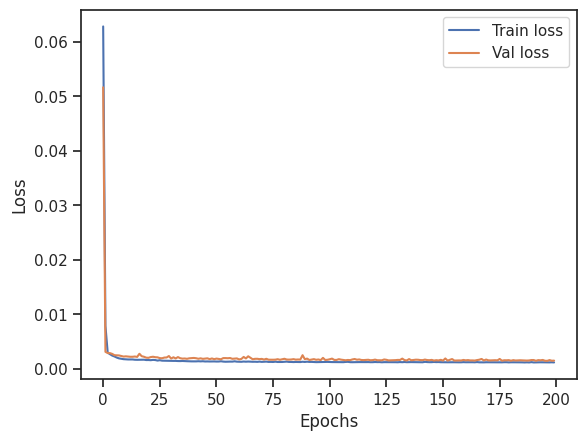

In [ ]:
sns.lineplot(x=np.arange(num_epochs), y=train_epoch_loss, label="Train loss")
sns.lineplot(x=np.arange(num_epochs), y=val_epoch_loss, label="Val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Get all the predictions on the train and validation set

In [ ]:
train_data_loader = data_module.data_loader(X_train, Y_train, shuffle=False)
train_total_predictions = list()
for batch_idx, batch in tqdm(enumerate(train_data_loader), total=len(train_data_loader), desc="Predicting on Train set"):
    batch = (batch[0].to(device), batch[1].to(device))
    _, preds = best_model.validation_step(batch, batch_idx)
    train_total_predictions.extend(preds)
train_total_predictions = np.asarray(train_total_predictions)
train_total_predictions = scaler.inverse_transform(train_total_predictions)
ground_truth = scaler.inverse_transform(Y_train)
print("Training MSE:", np.mean(np.square(train_total_predictions - ground_truth), axis=0), "\n\n")

val_total_predictions = list()
for batch_idx, batch in tqdm(enumerate(val_data_loader), total=len(val_data_loader), desc="Predicting on Val set"):
    batch = (batch[0].to(device), batch[1].to(device))
    _, preds = best_model.validation_step(batch, batch_idx)
    val_total_predictions.extend(preds)
val_total_predictions = np.asarray(val_total_predictions)
val_total_predictions = scaler.inverse_transform(val_total_predictions)
ground_truth = scaler.inverse_transform(Y_val)
print("Validation MSE:", np.mean(np.square(val_total_predictions - ground_truth), axis=0), "\n\n")

test_total_predictions = list()
for batch_idx, batch in tqdm(enumerate(test_data_loader), total=len(test_data_loader), desc="Predicting on Test set"):
    batch = (batch[0].to(device), batch[1].to(device))
    _, preds = best_model.validation_step(batch, batch_idx)
    test_total_predictions.extend(preds)
test_total_predictions = np.asarray(test_total_predictions)
test_total_predictions = scaler.inverse_transform(test_total_predictions)
ground_truth = scaler.inverse_transform(Y_test)
print("Test MSE:", np.mean(np.square(test_total_predictions - ground_truth), axis=0))


Predicting on Train set: 100%|██████████| 55/55 [00:00<00:00, 61.68it/s]

Training MSE: [1.12603182e+03 2.96593332e+02 8.06962937e+02 5.46120547e+02
 4.02739327e+17] 





Predicting on Val set: 100%|██████████| 12/12 [00:00<00:00, 54.40it/s]

Validation MSE: [2.88454348e+03 6.46717103e+02 1.96541182e+03 1.40027059e+03
 4.94083565e+17] 





Predicting on Test set: 100%|██████████| 12/12 [00:00<00:00, 49.18it/s]

Test MSE: [2.03066685e+04 1.33177889e+04 1.62053551e+04 1.81113820e+04
 6.34546512e+17]


## Now, plot the ground truth and corresponding predictions

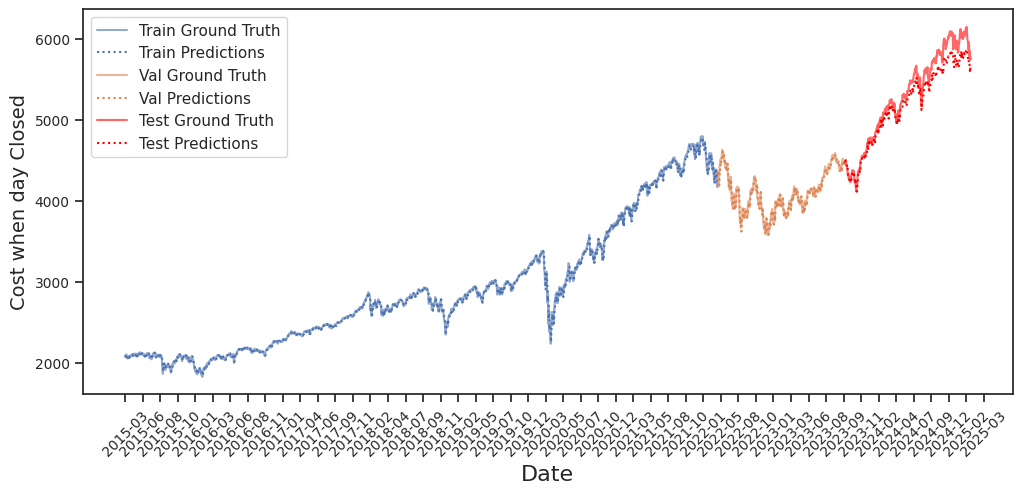

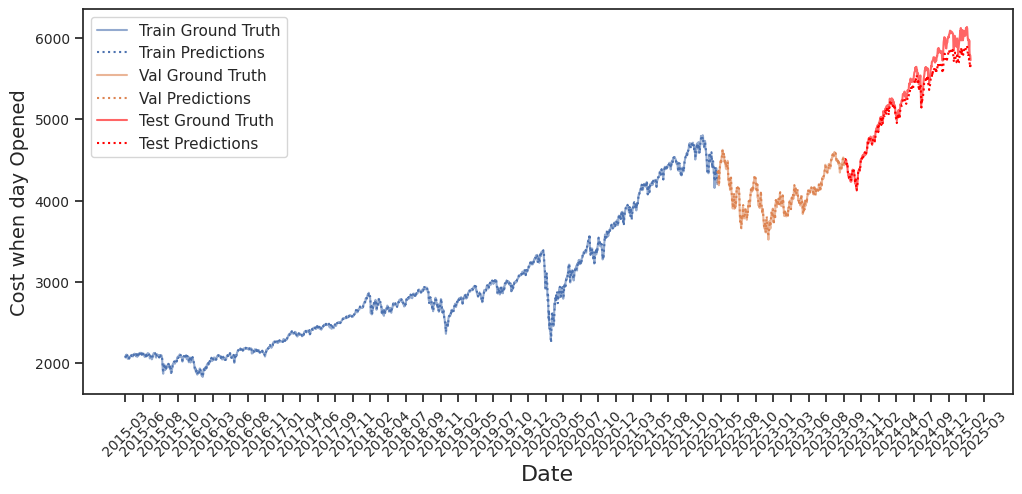

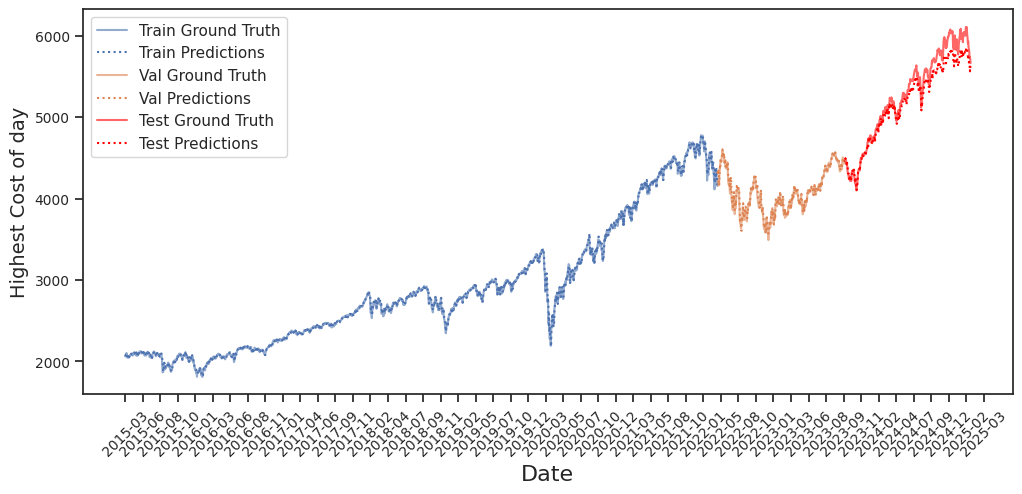

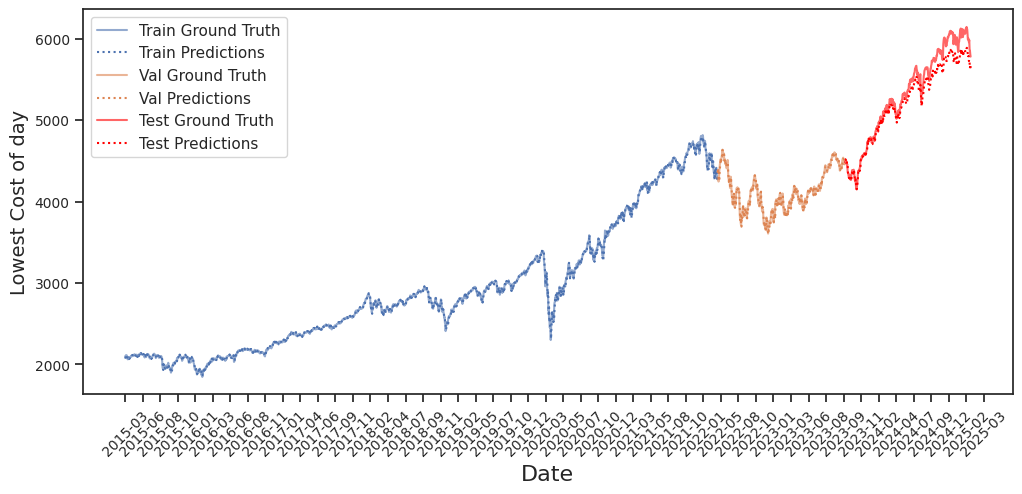

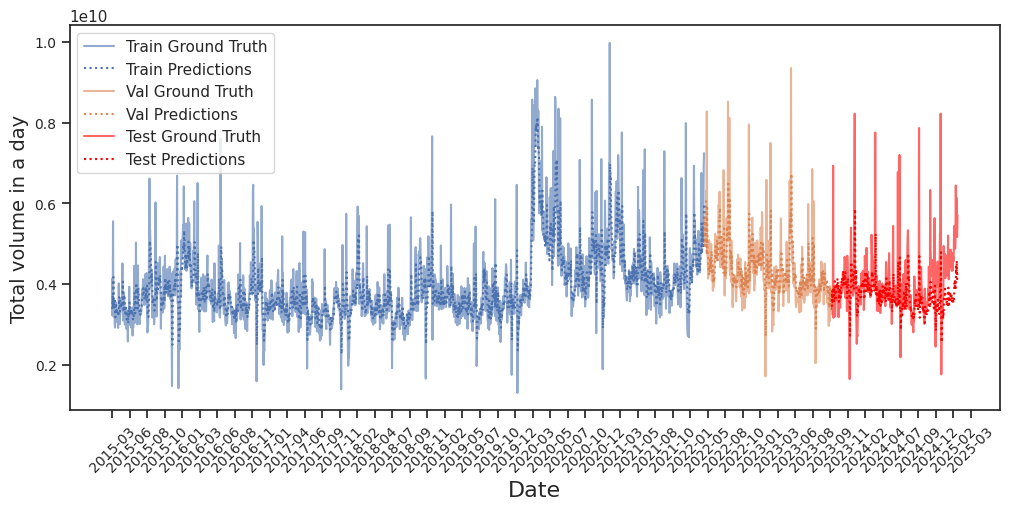

In [ ]:
y_value_train = scaler.inverse_transform(df_train[["Close", "Open", "Low", "High", "Volume"]])
y_value_val = scaler.inverse_transform(df_val[["Close", "Open", "Low", "High", "Volume"]])
y_value_test = scaler.inverse_transform(df_test[["Close", "Open", "Low", "High", "Volume"]])

labels = ["Cost when day Closed",
          "Cost when day Opened",
          "Highest Cost of day",
          "Lowest Cost of day",
          "Total volume in a day"]
num_ticks_skip = 52

for i in range(5):
    plt.figure(figsize=(12, 5))
    y_value = y_value_train[window_size:,i]
    sns.lineplot(x=np.arange(len(df_train[window_size:])), y=y_value, label="Train Ground Truth", color="#4c72b0", alpha=0.6)
    sns.lineplot(x=np.arange(len(df_train[window_size:])), y=train_total_predictions[:,i], label="Train Predictions", color="#4c72b0", linestyle=":")

    y_value = y_value_val[:,i]
    sns.lineplot(x=np.arange(len(df_train[window_size:]), len(df_train[window_size:])+len(df_val)), y=y_value, label="Val Ground Truth", color="#dd8452", alpha=0.6)
    sns.lineplot(x=np.arange(len(df_train[window_size:]), len(df_train[window_size:])+len(df_val)), y=val_total_predictions[:,i], label="Val Predictions", color="#dd8452", linestyle=":")

    y_value = y_value_test[:,i]
    sns.lineplot(x=np.arange(len(df_train[window_size:])+len(df_val), len(df_train[window_size:])+len(df_val)+len(df_test)), y=y_value, label="Test Ground Truth", color="red", alpha=0.6)
    sns.lineplot(x=np.arange(len(df_train[window_size:])+len(df_val), len(df_train[window_size:])+len(df_val)+len(df_test)), y=test_total_predictions[:,i], label="Test Predictions", color="red", linestyle=":")

    train_ticks = [i for idx, i in enumerate(df_train["Date"].dt.strftime("%Y-%m").tolist()[window_size:]) if idx%num_ticks_skip==0]
    val_ticks = [i for idx, i in enumerate(df_val["Date"].dt.strftime("%Y-%m").tolist()) if (idx+1)%num_ticks_skip==0] + [df_val["Date"].dt.strftime("%Y-%m").tolist()[-1]]
    test_ticks = [i for idx, i in enumerate(df_test["Date"].dt.strftime("%Y-%m").tolist()) if (idx+1)%num_ticks_skip==0] + [df_test["Date"].dt.strftime("%Y-%m").tolist()[-1]]
    plt.xticks(np.arange(0, len(df_train[window_size:])+len(df_val)+len(df_test)+num_ticks_skip, num_ticks_skip), train_ticks + val_ticks + test_ticks, rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel("Date", fontsize=16)
    plt.ylabel(labels[i], fontsize=14)
    plt.legend()
    plt.show()
    plt.close()
    print()

## Define the Pytorch GRU model

In [ ]:
class PytorchGRU(torch.nn.Module):
    def __init__(self, num_layers, input_size, hidden_size, bias, device):
        super(PytorchGRU, self).__init__()
        self.GRU = torch.nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, bias=bias, batch_first=True, device=device)
        # The final output layer
        self.linear = torch.nn.Linear(hidden_size, 5)
        # Define the optimizer
        self.optimizer = torch.optim.AdamW(self.parameters(), lr=0.0001)
        # Define the objective function
        self.criterion = torch.nn.MSELoss()

    def forward(self, x):
        ht = torch.randn((self.GRU.num_layers, x.shape[0], self.GRU.hidden_size)).to(x.device)
        # ht = ht/torch.sqrt(torch.sum(torch.square(ht), dim=0))
        x, ht = self.GRU(x, ht)
        x = self.linear(x[:,-1]).squeeze()
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        self.optimizer.zero_grad()
        preds = self.forward(x.float())
        loss = self.criterion(preds, y.float())
        loss.backward()
        self.optimizer.step()
        return loss.item(), preds.numpy(force=True)

    def validation_step(self, batch, batch_idx):
        x, y = batch
        preds = self.forward(x.float())
        loss = self.criterion(preds, y.float())
        return loss.item(), preds.numpy(force=True)

## Perform Training and Validation using Pytorch GRU

In [ ]:
num_layers = 4
input_size = X_train.shape[-1]
hidden_size = 128
num_epochs = 200

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PytorchGRU(num_layers, input_size, hidden_size, True, device).to(device)

train_epoch_loss = list()
val_epoch_loss = list()
min_val_loss = np.inf
for epoch in tqdm(range(num_epochs)):
    # Training loop
    train_iter_loss = list()
    model.train()
    for batch_idx, batch in enumerate(train_data_loader):
        batch = (batch[0].to(device), batch[1].to(device))
        loss, _ = model.training_step(batch, batch_idx)
        train_iter_loss.append(loss)
    train_epoch_loss.append(sum(train_iter_loss)/len(train_iter_loss))
    # print("\nAverage Training MSE in Epoch", epoch+1, ":", train_epoch_loss[-1], "\n")

    # Validation loop
    val_iter_loss = list()
    model.eval()
    for batch_idx, batch in enumerate(val_data_loader):
        batch = (batch[0].to(device), batch[1].to(device))
        loss, _ = model.validation_step(batch, batch_idx)
        val_iter_loss.append(loss)
    val_epoch_loss.append(sum(val_iter_loss)/len(val_iter_loss))
    if val_epoch_loss[-1] < min_val_loss:
        min_val_loss = val_epoch_loss[-1]
        best_model = deepcopy(model)
    # print("\nAverage Validation MSE in Epoch", epoch+1, ":", val_epoch_loss[-1], "\n")

100%|██████████| 200/200 [01:55<00:00,  1.73it/s]


## Plot the training and validation losses

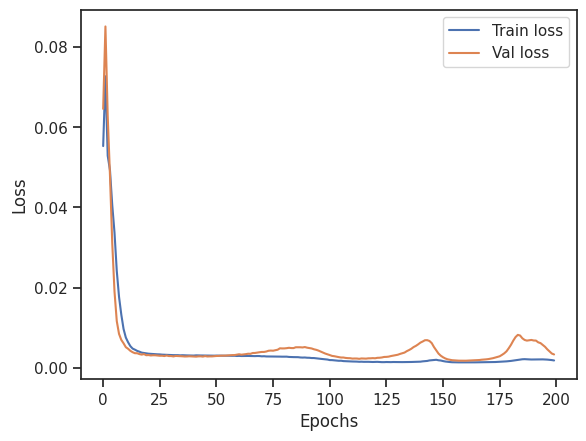

In [ ]:
sns.lineplot(x=np.arange(num_epochs), y=train_epoch_loss, label="Train loss")
sns.lineplot(x=np.arange(num_epochs), y=val_epoch_loss, label="Val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Get all the predictions on the train and validation set

In [ ]:
train_data_loader = data_module.data_loader(X_train, Y_train, shuffle=False)
train_total_predictions = list()
for batch_idx, batch in tqdm(enumerate(train_data_loader), total=len(train_data_loader), desc="Predicting on Train set"):
    batch = (batch[0].to(device), batch[1].to(device))
    _, preds = best_model.validation_step(batch, batch_idx)
    train_total_predictions.extend(preds)
train_total_predictions = np.asarray(train_total_predictions)
train_total_predictions = scaler.inverse_transform(train_total_predictions)
ground_truth = scaler.inverse_transform(Y_train)
print("Training MSE:", np.mean(np.square(train_total_predictions - ground_truth), axis=0), "\n\n")

val_total_predictions = list()
for batch_idx, batch in tqdm(enumerate(val_data_loader), total=len(val_data_loader), desc="Predicting on Val set"):
    batch = (batch[0].to(device), batch[1].to(device))
    _, preds = best_model.validation_step(batch, batch_idx)
    val_total_predictions.extend(preds)
val_total_predictions = np.asarray(val_total_predictions)
val_total_predictions = scaler.inverse_transform(val_total_predictions)
ground_truth = scaler.inverse_transform(Y_val)
print("Validation MSE:", np.mean(np.square(val_total_predictions - ground_truth), axis=0), "\n\n")

test_total_predictions = list()
for batch_idx, batch in tqdm(enumerate(test_data_loader), total=len(test_data_loader), desc="Predicting on Test set"):
    batch = (batch[0].to(device), batch[1].to(device))
    _, preds = best_model.validation_step(batch, batch_idx)
    test_total_predictions.extend(preds)
test_total_predictions = np.asarray(test_total_predictions)
test_total_predictions = scaler.inverse_transform(test_total_predictions)
ground_truth = scaler.inverse_transform(Y_test)
print("Test MSE:", np.mean(np.square(test_total_predictions - ground_truth), axis=0))


Predicting on Train set:   0%|          | 0/55 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:1392: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.gru(
Predicting on Train set: 100%|██████████| 55/55 [00:00<00:00, 191.39it/s]

Training MSE: [2.81534670e+03 4.74388707e+03 2.02066974e+03 3.85783282e+03
 4.37153491e+17] 





Predicting on Val set:   0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:1392: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.gru(
Predicting on Val set: 100%|██████████| 12/12 [00:00<00:00, 116.55it/s]

Validation MSE: [4.20417540e+03 2.38006072e+03 3.86925049e+03 2.82215962e+03
 5.48072862e+17] 





Predicting on Test set:   0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:1392: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.gru(
Predicting on Test set: 100%|██████████| 12/12 [00:00<00:00, 110.35it/s]

Test MSE: [1.88170117e+04 7.43560072e+03 2.90956351e+04 8.64690610e+03
 6.75378396e+17]


## Now, plot the ground truth and corresponding predictions

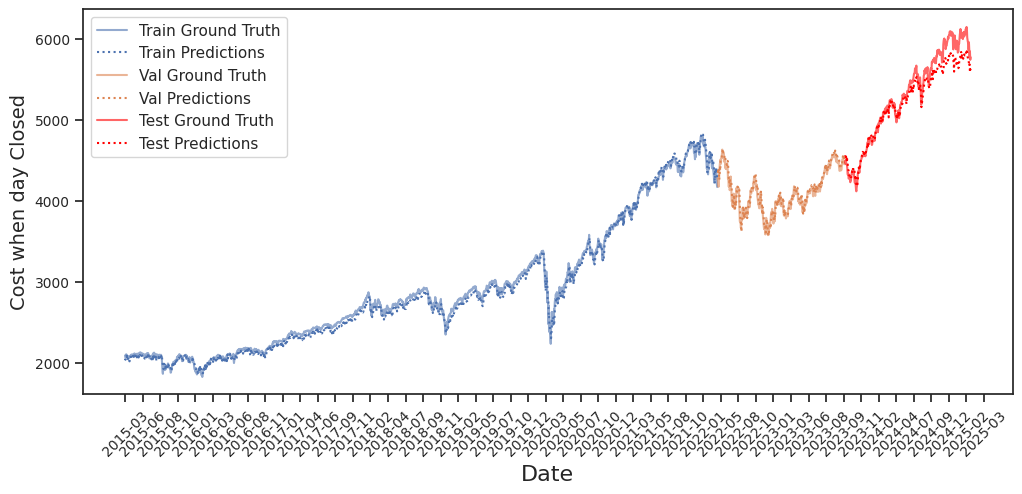

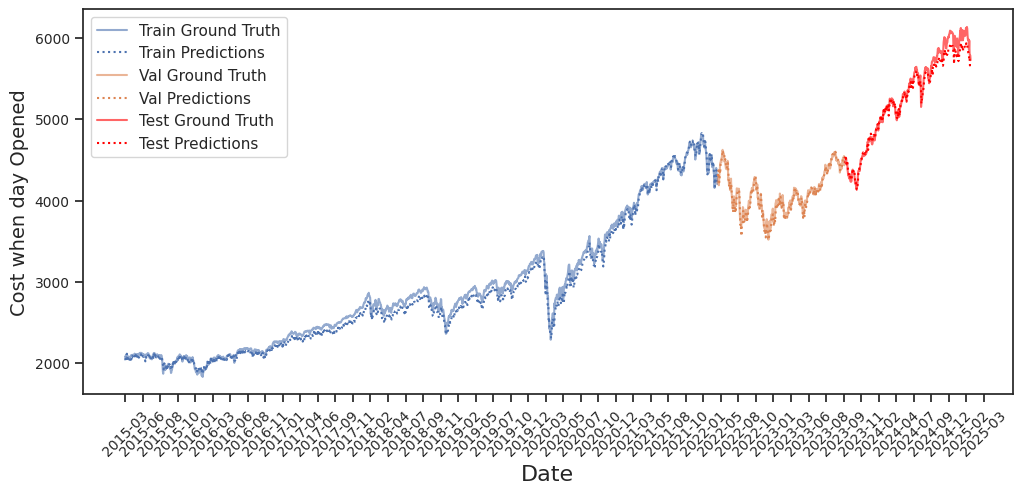

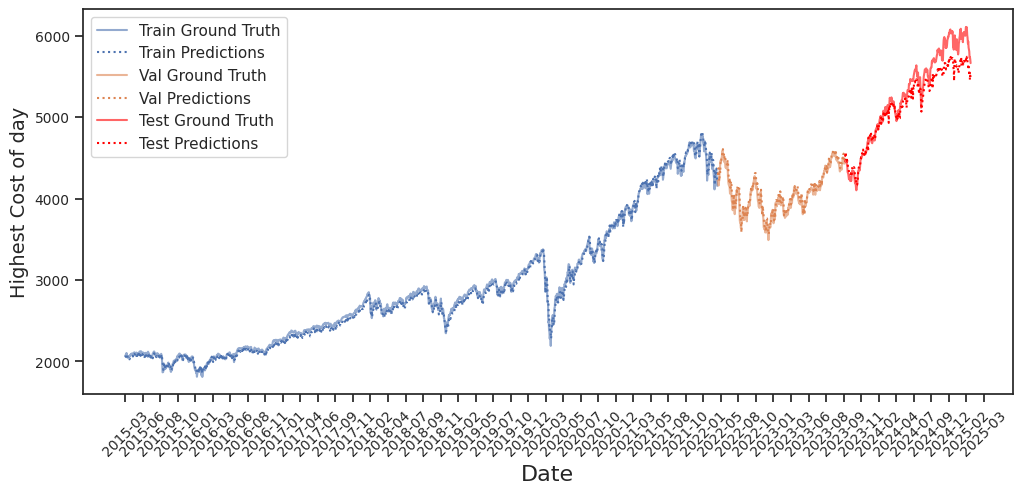

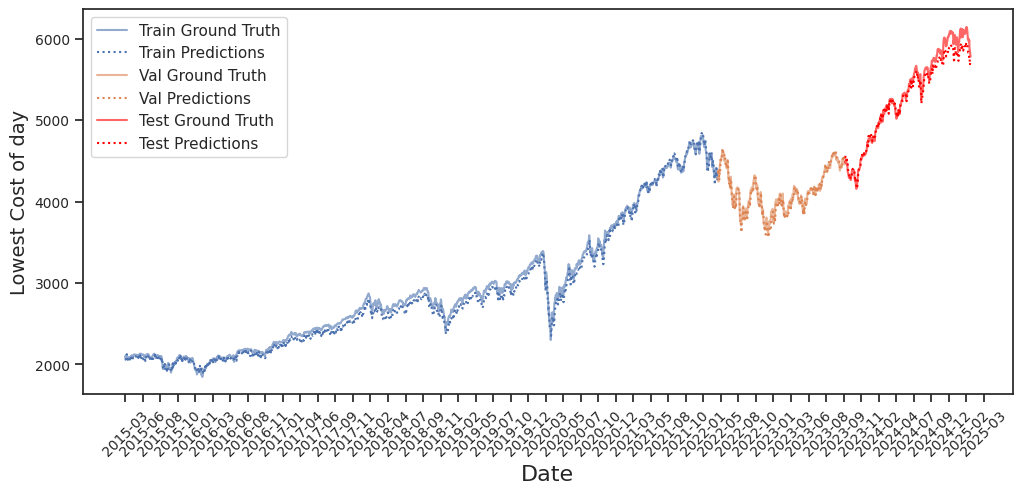

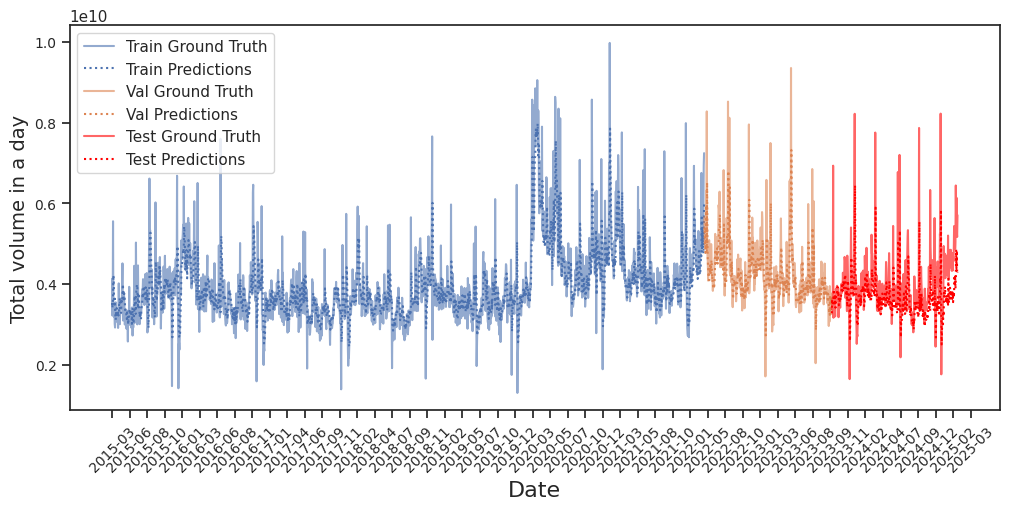

In [ ]:
y_value_train = scaler.inverse_transform(df_train[["Close", "Open", "Low", "High", "Volume"]])
y_value_val = scaler.inverse_transform(df_val[["Close", "Open", "Low", "High", "Volume"]])
y_value_test = scaler.inverse_transform(df_test[["Close", "Open", "Low", "High", "Volume"]])

labels = ["Cost when day Closed",
          "Cost when day Opened",
          "Highest Cost of day",
          "Lowest Cost of day",
          "Total volume in a day"]
num_ticks_skip = 52

for i in range(5):
    plt.figure(figsize=(12, 5))
    y_value = y_value_train[window_size:,i]
    sns.lineplot(x=np.arange(len(df_train[window_size:])), y=y_value, label="Train Ground Truth", color="#4c72b0", alpha=0.6)
    sns.lineplot(x=np.arange(len(df_train[window_size:])), y=train_total_predictions[:,i], label="Train Predictions", color="#4c72b0", linestyle=":")

    y_value = y_value_val[:,i]
    sns.lineplot(x=np.arange(len(df_train[window_size:]), len(df_train[window_size:])+len(df_val)), y=y_value, label="Val Ground Truth", color="#dd8452", alpha=0.6)
    sns.lineplot(x=np.arange(len(df_train[window_size:]), len(df_train[window_size:])+len(df_val)), y=val_total_predictions[:,i], label="Val Predictions", color="#dd8452", linestyle=":")

    y_value = y_value_test[:,i]
    sns.lineplot(x=np.arange(len(df_train[window_size:])+len(df_val), len(df_train[window_size:])+len(df_val)+len(df_test)), y=y_value, label="Test Ground Truth", color="red", alpha=0.6)
    sns.lineplot(x=np.arange(len(df_train[window_size:])+len(df_val), len(df_train[window_size:])+len(df_val)+len(df_test)), y=test_total_predictions[:,i], label="Test Predictions", color="red", linestyle=":")

    train_ticks = [i for idx, i in enumerate(df_train["Date"].dt.strftime("%Y-%m").tolist()[window_size:]) if idx%num_ticks_skip==0]
    val_ticks = [i for idx, i in enumerate(df_val["Date"].dt.strftime("%Y-%m").tolist()) if (idx+1)%num_ticks_skip==0] + [df_val["Date"].dt.strftime("%Y-%m").tolist()[-1]]
    test_ticks = [i for idx, i in enumerate(df_test["Date"].dt.strftime("%Y-%m").tolist()) if (idx+1)%num_ticks_skip==0] + [df_test["Date"].dt.strftime("%Y-%m").tolist()[-1]]
    plt.xticks(np.arange(0, len(df_train[window_size:])+len(df_val)+len(df_test)+num_ticks_skip, num_ticks_skip), train_ticks + val_ticks + test_ticks, rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel("Date", fontsize=16)
    plt.ylabel(labels[i], fontsize=14)
    plt.legend()
    plt.show()
    plt.close()
    print()